<a href="https://colab.research.google.com/github/Rohan-Kumar-Singh/AI-Based-Multilingual-Fake-News-Prediction-System/blob/master/AI_Based_Multilingual_Fake_News_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


news_data = pd.read_csv('/content/drive/MyDrive/Dataset/Large_Data/Hindi_Eng_News.csv')

news_data.head()

,text,label
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,Real
1,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,Real
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",Real
3,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,Real
4,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...,Real


In [ ]:
news_data.tail()

,text,label
53085,21st Century Wire says As 21WIRE reported earl...,Fake
53086,21st Century Wire says It s a familiar theme. ...,Fake
53087,Patrick Henningsen 21st Century WireRemember ...,Fake
53088,21st Century Wire says Al Jazeera America will...,Fake
53089,21st Century Wire says As 21WIRE predicted in ...,Fake


In [ ]:
news_data['is_fake'] = [False if x =='Fake' else True for x in news_data['label']]
news_data.head()

,text,label,is_fake
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,Real,True
1,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,Real,True
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",Real,True
3,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,Real,True
4,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...,Real,True


In [ ]:
news_data.tail()

,text,label,is_fake
53085,21st Century Wire says As 21WIRE reported earl...,Fake,False
53086,21st Century Wire says It s a familiar theme. ...,Fake,False
53087,Patrick Henningsen 21st Century WireRemember ...,Fake,False
53088,21st Century Wire says Al Jazeera America will...,Fake,False
53089,21st Century Wire says As 21WIRE predicted in ...,Fake,False


In [ ]:
news_data.pop('label')

0        Real
1        Real
2        Real
3        Real
4        Real
         ... 
53085    Fake
53086    Fake
53087    Fake
53088    Fake
53089    Fake
Name: label, Length: 53090, dtype: object

In [ ]:
from sklearn.utils import shuffle

# Shuffle the data
data = shuffle(news_data).reset_index(drop=True)
data.head()

,text,is_fake
0,"***UPDATE***The listing has been removed, and ...",False
1,BERLIN (Reuters) - German politicians visited ...,True
2,Jamie Ross Courthouse News ServicePHOENIX Tw...,False
3,WASHINGTON (Reuters) - U.S. President Donald T...,True
4,NEW YORK (Reuters) - U.S. President-elect Dona...,True


In [ ]:
train_data, validate_data, test_data = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

train_data = train_data.reset_index(drop=True)
validate_data = validate_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
del news_data

print("Size of training set: {}".format(len(train_data)))
print("Size of validation set: {}".format(len(validate_data)))
print("Size of testing set: {}".format(len(test_data)))

Size of training set: 31854
Size of validation set: 10618
Size of testing set: 10618


In [ ]:
!conda install -y pytorch torchvision cudatoolkit=10.1 -c pytorch
!pip install transformers

/bin/bash: conda: command not found
     |████████████████████████████████| 3.1 MB 4.2 MB/s 
     |████████████████████████████████| 895 kB 45.5 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 3.3 MB 39.3 MB/s 
     |████████████████████████████████| 596 kB 49.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-uncased")
model.config.num_labels = 1

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.64M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/641M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

In [ ]:
# Freeze the pre trained parameters
for param in model.parameters():
    param.requires_grad = False

# Add three new layers at the end of the network
model.classifier = nn.Sequential(
    nn.Linear(768, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 2),
    nn.Softmax(dim=1)
)

model = model.to(device)

In [ ]:
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.classifier.parameters(), lr=0.01)

In [ ]:
def preprocess_text(text):
    parts = []

    text_len = len(text.split(' '))
    delta = 300
    max_parts = 5
    nb_cuts = int(text_len / delta)
    nb_cuts = min(nb_cuts, max_parts)
    
    
    for i in range(nb_cuts + 1):
        text_part = ' '.join(text.split(' ')[i * delta: (i + 1) * delta])
        parts.append(tokenizer.encode(text_part, return_tensors="pt", max_length=500).to(device))

    return parts

In [ ]:
print_every = 300

total_loss = 0
all_losses = []

CUDA_LAUNCH_BLOCKING=1

model.train()

for idx, row in train_data.iterrows():
    text_parts = preprocess_text(str(row['text']))
    label = torch.tensor([row['is_fake']]).long().to(device)

    optimizer.zero_grad()

    overall_output = torch.zeros((1, 2)).float().to(device)
    for part in text_parts:
        if len(part) > 0:
            try:
                input = part.reshape(-1)[:512].reshape(1, -1)
                # print(input.shape)
                overall_output += model(input, labels=label)[1].float().to(device)
            except Exception as e:
                print(str(e))

#     overall_output /= len(text_parts)
    overall_output = F.softmax(overall_output[0], dim=-1)

    if label == 0:
        label = torch.tensor([1.0, 0.0]).float().to(device)
    elif label == 1:
        label = torch.tensor([0.0, 1.0]).float().to(device)

    # print(overall_output, label)

    loss = criterion(overall_output, label)
    total_loss += loss.item()
    
    loss.backward()
    optimizer.step()

    if idx % print_every == 0 and idx > 0:
        average_loss = total_loss / print_every
        print("{}/{}. Average loss: {}".format(idx, len(train_data), average_loss))
        all_losses.append(average_loss)
        total_loss = 0

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


300/31854. Average loss: 0.24930340799192588
600/31854. Average loss: 0.2491596533358097
900/31854. Average loss: 0.24400695169965425
1200/31854. Average loss: 0.23569807703296344
1500/31854. Average loss: 0.23653172286848226
1800/31854. Average loss: 0.23871671446909506
2100/31854. Average loss: 0.2381901470075051
2400/31854. Average loss: 0.2324054382617275
2700/31854. Average loss: 0.22895578689252336
3000/31854. Average loss: 0.22943875714205206
3300/31854. Average loss: 0.23313618117012083
3600/31854. Average loss: 0.2280290616552035
3900/31854. Average loss: 0.23307434218625228
4200/31854. Average loss: 0.22726344832995285
4500/31854. Average loss: 0.2248705191165209
4800/31854. Average loss: 0.23004674196864167
5100/31854. Average loss: 0.20834635894124706
5400/31854. Average loss: 0.22229565230198203
5700/31854. Average loss: 0.2254031573391209
6000/31854. Average loss: 0.21982106301855917
6300/31854. Average loss: 0.2146548043222477
6600/31854. Average loss: 0.2036195268016308

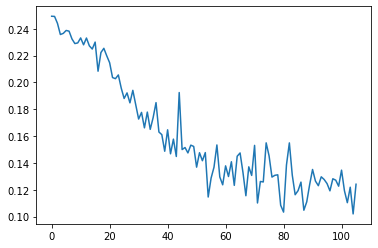

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
torch.save(model.state_dict(), "model_after_train.pt")

plt.plot(all_losses)

In [ ]:
total = len(test_data)
number_right = 0
model.eval()
with torch.no_grad():
    for idx, row in test_data.iterrows():
        text_parts = preprocess_text(str(row['text']))
        label = torch.tensor([row['is_fake']]).float().to(device)
        
        overall_output = torch.zeros((1,2)).to(device)
        try:
            for part in text_parts:
                if len(part) > 0:
                    overall_output += model(part.reshape(1, -1))[0]
        except RuntimeError:
            print("GPU out of memory, skipping this entry.")
            continue
            
        overall_output = F.softmax(overall_output[0], dim=-1)
            
        result = overall_output.max(0)[1].float().item()
 
        if result == label.item():
            number_right += 1
            
        if idx % print_every == 0 and idx > 0:
            print("{}/{}. Current accuracy: {}".format(idx, total, number_right / idx))
            
print("Accuracy on test data: {}".format(number_right / total))
            
        

300/10618. Current accuracy: 0.8366666666666667
600/10618. Current accuracy: 0.8233333333333334
900/10618. Current accuracy: 0.8222222222222222
1200/10618. Current accuracy: 0.82
1500/10618. Current accuracy: 0.8253333333333334
1800/10618. Current accuracy: 0.8277777777777777
2100/10618. Current accuracy: 0.8295238095238096
2400/10618. Current accuracy: 0.8308333333333333
2700/10618. Current accuracy: 0.832962962962963
3000/10618. Current accuracy: 0.8316666666666667
3300/10618. Current accuracy: 0.8327272727272728
3600/10618. Current accuracy: 0.8344444444444444
3900/10618. Current accuracy: 0.8317948717948718
4200/10618. Current accuracy: 0.8316666666666667
4500/10618. Current accuracy: 0.832
4800/10618. Current accuracy: 0.8329166666666666
5100/10618. Current accuracy: 0.831764705882353
5400/10618. Current accuracy: 0.8333333333333334
5700/10618. Current accuracy: 0.834561403508772
6000/10618. Current accuracy: 0.8336666666666667
6300/10618. Current accuracy: 0.8338095238095238
6600

In [ ]:
def test(text):
    text_parts = preprocess_text(text)
    overall_output = torch.zeros((1,2)).to(device)
    try:
        for part in text_parts:
            if len(part) > 0:
                overall_output += model(part.reshape(1, -1))[0]
    except RuntimeError:
        print("GPU out of memory, skipping this entry.")

    overall_output = F.softmax(overall_output[0], dim=-1)

    value, result = overall_output.max(0)

    term = "fake"
    if result.item() == 0:
        term = "real"

    print("{} at {}%".format(term, value.item() * 100))

In [ ]:
fake1 = """
At this point in the election, Republican front runner Donald Trump has said enough stupid, offensive, 
hateful and dishonest things for us to form a highly negative opinion of not only the candidate, but his loyal supporters, 
staff and voters.Anyone who could wholeheartedly stand behind Trump   and there are unfortunately a lot of conservatives who can   is a threat to the future of the country.
 While that s pretty scary, there s something that might be even creepier: if one of Trump s minions wants to volunteer for Trump s campaign phone bank,
  they re required to sign a six-page binding contract that says they will never insult Trump (or his family members, businesses or campaign) for the rest of their lives!
   Should they use their constitutional rights to speak poorly against him, Trump will sue.Given how sensitive Trump is to insults nowadays 
   (remember the fuss he made when former rival Marco Rubio insulted his hands?), it s not really shocking that Trump would make volunteers sign a loyalty oath.
    That, and the fact that Trump is absolutely egotistical and power-hungry.Last week, NBC reported that
     Trump was actually forcing campaign volunteers to sign contracts before they could begin helping him get elected after a strange email came to light.
      NBC said: In a Thursday email inviting supporters for phone-banking at Trump Tower, the campaign tells supporters to attend a briefing and then sign your NDA before volunteering begins. 
      Here s a screenshot of that email:Via NBCA few days ago, The Daily Dot was able to obtain one of these free speech violating contracts. And yes, the contents are just as ludicrous as they sound: Promise and agree not to demean or disparage publicly the Company,
       Mr. Trump, any Trump Company, any Family Member, or any Family Member Company or any asset any of the foregoing own, or product or service any of the foregoing offer, in each case by or in any of the Restricted Means and Contexts and to prevent your employees from doing so.
        Part of Trump s contract, via Daily DotAlso in the contract are guidelines that volunteers are basically legally bound to Trump   they re prohibited to volunteer for any other presidential candidate, should they suddenly become sane and change their minds. 
        There s no end date to these contracts, so Trump is pretty much making these people sign their lives away to him. Talk about making a deal with the devil The Daily Dot dug deeper and asked Davida Perry, an employment lawyer in New York City, if these contracts would actually be respected in court.
         Perry said that they wouldn t, and added: I guess [Trump] doesn t know about the First Amendment. This is really shocking. He s apparently so afraid that people would say something bad about him after spending some time on his campaign that they have to sign some sort of agreement.
          I don t see how this stands up. I don t see how a court enforces this. Well, Trump actually knows tons about free speech, but only acknowledges those rights when it will benefit him. Previously, Trump has threatened to sue the media for using their First Amendment rights to run unfavorable news against him. Featured image via Gage Skidmore """

true1 = """
Price spikes, however, would cause demand to wither and some expensive avocados might be leftover, and stores might try to ration avocados, he added.
"Exactly what the retail strategy would be in this case, I’m not sure. But we would have vastly fewer avocados," Sumner said.
Just how fast avocados would disappear, if at all, would depend on whether the Trump administration enacts a full or partial border closure. White House economic adviser Larry Kudlow told CNBC he’s looking for ways to keep some commerce flowing.
"We are looking at different options, particularly if you can keep those freight lanes, the truck lanes, open," he said this week.  
Ben Holtz owns Rocky H Ranch, a 70-acre family-run avocado farm in northern San Diego County. He agreed avocados would run out within weeks.
"Mexico is the big player today. California is not. You shut down the border and California can’t produce to meet the demand," Holtz said. "There will be people without their guacamole."
While Mexico’s avocado harvest is year-round, California’s is limited to April through July. Growers in the state have picked only about 3 percent of what’s expected to be a much smaller crop of about 175 million pounds this year, Holtz said. A heat wave last summer reduced the crop size.
California’s avocado harvest has averaged approximately 300 million pounds in recent years, according to data from the California Avocado Commission. By contrast, the U.S. has imported more than 1.5 billion pounds of avocados from Mexico annually. Representatives from the commission did not respond to requests for this article.
Altogether, the U.S. received 43 percent of its fruit and vegetable imports from Mexico in 2016, according to the U.S. Department of Agriculture.
Also affecting this year’s avocado supply, a California avocado company in March recalled shipments to six states last month after fears the fruit might be contaminated with a bacterium that can cause health risks.
Until the early 2000s, California was the nation’s leading supplier of avocados, Holtz said. Mexico gradually overtook the state and now dominates sales in the U.S.
"It’s a very big possibility," Holtz said of avocado shortages. "Three weeks would dry up the Mexican inventory. California alone consumes more avocados than are grown in our state. Cold storage supply chain is basically three weeks or less of inventory. Most of the time it’s seven days."
A spokeswoman for the California Restaurant Association said "we haven’t heard concerns from restaurants, it doesn’t mean they aren’t worried." A national grocers association said it will "continue to closely monitor any developments" at the border, but did not have information about the potential impact on avocados.
"""

test(fake1)
test(true1)

fake at 95.22919058799744%
real at 84.8332941532135%


In [ ]:
fake1 = """
BMC की अपील: अगले सात दिनों तक गरम पानी का सेवन करें
 """

true1 = """
अद्भुत - जो वामपंथी कहते है कि महाभारत का युद्ध काल्पनिक है, और सनातन धर्म कुछ है ही नही। उनके मुंह पर विदेशी पुरातत्व विभाग ने जोरदार तमाचा मार दिया है। 
कुरूक्षेत्र के पास खुदाई करते समय विदेशी पुरातत्व विशेषज्ञों को एक 80 फुट की लम्बाई के मानव कंकाल के अवषेश मिले । जो महाभारत के भीम के पुत्र घटोत्कच के वर्णन के समान है । और हम भारत वासियों को महाभारत ही कहानी काल्पनीक लगती है । इसे डिस्कवरी चैनल ने प्रसारित किया है । जय हो सनातन धर्म की जय हो | जय श्री राम जय श्री कृष्ण

"""

test(fake1)
test(true1)

fake at 50.37509202957153%
real at 60.63549518585205%
